In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import important libary in this project
cv2 - main libary use to operate with image.
numpy - use for operate with array.

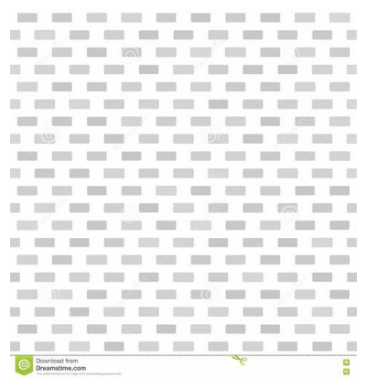

In [117]:
N_SCALING_TO_CALCUALTION = 0.8

p = r"sample.jpg"
image = cv2.imread(p)
y, x, channel = image.shape

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(
                    image,(int(x*N_SCALING_TO_CALCUALTION),
                           int(y*N_SCALING_TO_CALCUALTION))
                  )
plt.imshow(image.astype('uint8'))  # Ensure pixel values are within 0-255 range
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

from above code we read an image that named `sample.jpg` as `RGB image` and store as a variable named `image`.that check size of image (pixel on x and y) with `image.shape`. and reduce amount of pixel remains 80% from 100%.

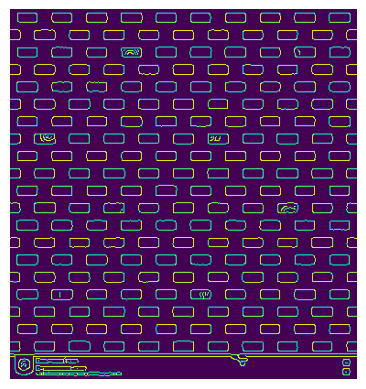

In [118]:
#coding
image = cv2.GaussianBlur(image, (5, 5), 0)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 10, 30)

#image show
plt.imshow(edges.astype('uint8'))  # Ensure pixel values are within 0-255 range
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


that we reduce noise of picture with `GaussianBlur` method, remove some unuse pixel in an image. and turn `RGB image` to `GrayScale image`. then input `GrayScale image` into method named `cv2.Canny` to detection edges of each rectangle. so result shown a picture above.

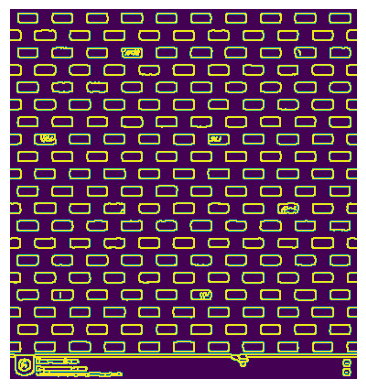

In [119]:
kernel = np.ones((2, 2), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)

plt.imshow(dilated.astype('uint8'))  # Ensure pixel values are within 0-255 range
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

we almost finsh, after reduce noise and detection edges. we need some of `morphology method` to dilate a edge line with `cv2.dilate` to make edge bigger and this easy to estimate as a rectangle.

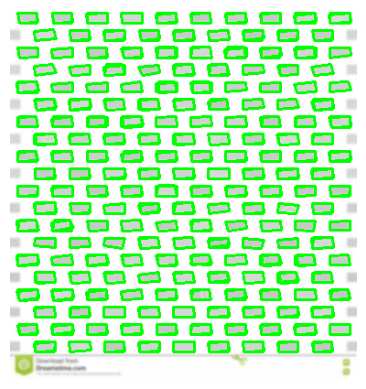

there are 190 rectangles in this image


In [121]:
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rec_count = 0
# Loop through the contours
for contour in contours:
    # Approximate the contour
    epsilon = 0.06 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    rect_x, rect_y, rect_w, rect_h = cv2.boundingRect(approx)

    # If the contour has 4 vertices and x-cor > 350
    if len(approx) == 4 and rect_y < 380:
        rec_count += 1
        cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)

plt.imshow(image.astype('uint8'))  # Ensure pixel values are within 0-255 range
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(f'there are {rec_count} rectangles in this image')

then we input `dilate image` into `cv2.findContours` to store all possible shape in this image all shape store in `contours`

final method, we loop over `contours` to check that which shape is a rectangle with method named `cv2.approxPolyDP` this method will estimate polygon of contour (shape) that we loop one by one, which contour have 4 polygon so that is a rectangle.

from this code we can count `190` rectangles in this image.